In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.neighbors import KernelDensity
from scipy.interpolate import interp1d

# Load data

In [3]:
data = load_boston()

In [4]:
X = data['data']
y = data['target']

In [5]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

# Scalers

In [6]:
for col in range(X.shape[1]):
    print(col, np.unique(X[:,col]).size)

0 504
1 26
2 76
3 2
4 81
5 446
6 356
7 412
8 9
9 66
10 46
11 357
12 455


In [7]:
array = X[:,-1].copy()

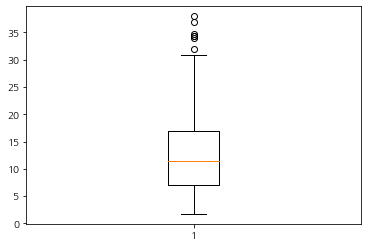

In [8]:
plt.boxplot(array)
plt.show()

In [9]:
from sklearn.neighbors import KernelDensity

kd = KernelDensity(bandwidth=1.5, breadth_first=True, kernel='gaussian')
kd.fit(array[:,np.newaxis])
array_density = np.exp(kd.score_samples(array[:,np.newaxis]))

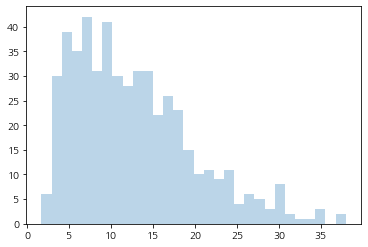

In [10]:
n_bins = 30
counts, bins, patchs = plt.hist(array, alpha=.3, bins=n_bins,)
area = sum(counts * np.diff(bins))

In [11]:
f = interp1d(array, array_density, kind='linear')
x = np.linspace(array.min(),array.max(), 1000)
fx = f(x)

## Standard scaler

$\large \displaystyle X_{scaled} = \frac{X - \mu}{\sigma}$

In [12]:
scaler = StandardScaler()
transformed = scaler.fit_transform(array.reshape(-1,1))

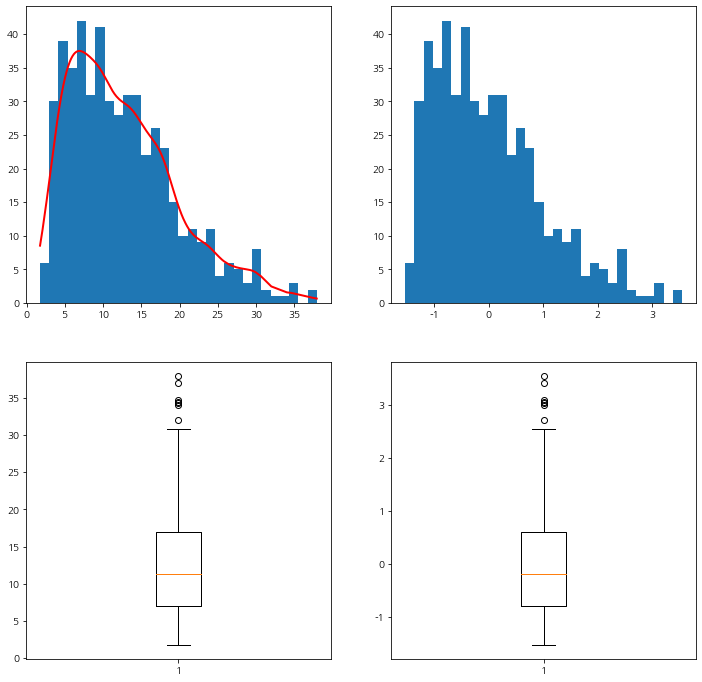

In [13]:
fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(12,12))
ax1.hist(array, bins=n_bins)
ax1.plot(x, fx*area, linewidth=2, color = 'r')
ax2.hist(transformed, bins=n_bins)

ax3.boxplot(array)
ax4.boxplot(transformed)
plt.show()

In [14]:
mean = array.mean()
std = array.std()
transformed1 = ((array - mean)/std).reshape(-1, 1)

In [15]:
np.alltrue(transformed == transformed1)

True

## MinMax scaler

$\large \displaystyle X_{scaled} = \frac{X - min}{max - min}$

In [16]:
scaler = MinMaxScaler()
transformed = scaler.fit_transform(array.reshape(-1,1))

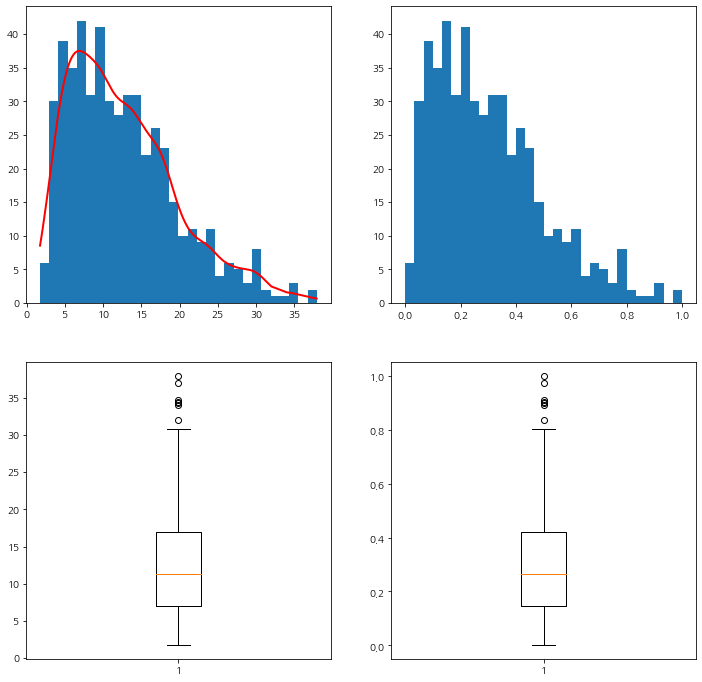

In [17]:
fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(12,12))
ax1.hist(array, bins=n_bins)
ax1.plot(x, fx*area, linewidth=2, color = 'r')
ax2.hist(transformed, bins=n_bins)

ax3.boxplot(array)
ax4.boxplot(transformed)
plt.show()

In [18]:
Min = array.min()
Max = array.max()
diff = Max - Min
transformed1 = ((array - Min)/diff).reshape(-1, 1)

In [19]:
np.allclose(transformed, transformed1)

True

## Robust scaler

$\large \displaystyle X_{scaled} = \frac{X - \tilde{X}}{IQR} = \frac{X - Q_2}{Q_3 - Q_1}$

In [20]:
scaler = RobustScaler()
transformed = scaler.fit_transform(array.reshape(-1,1))

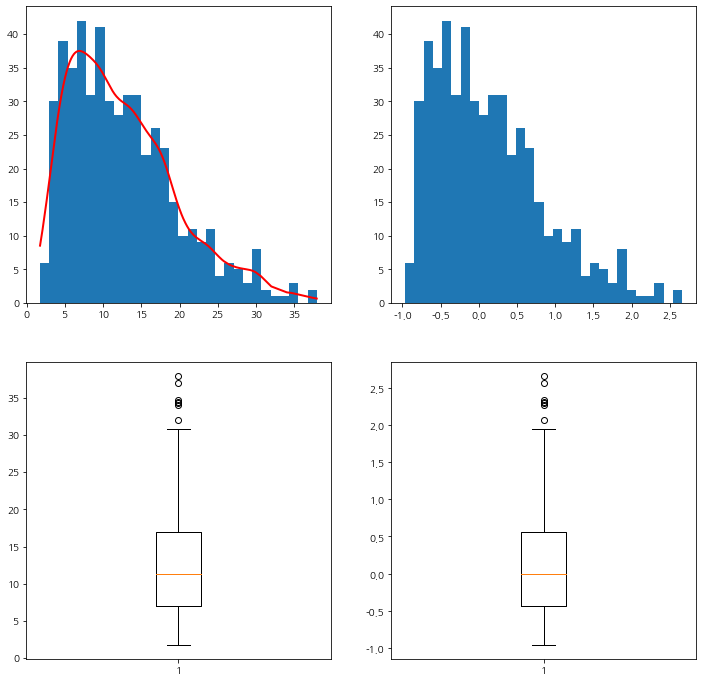

In [21]:
fig, ((ax1,ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(12,12))
ax1.hist(array, bins=n_bins)
ax1.plot(x, fx*area, linewidth=2, color = 'r')
ax2.hist(transformed, bins=n_bins)

ax3.boxplot(array)
ax4.boxplot(transformed)
plt.show()

In [22]:
median = np.median(array)
q1, q3 = np.quantile(array, q = [.25, .75])
iqr = q3 - q1
transformed1 = ((array - median)/iqr).reshape(-1, 1)

In [23]:
np.alltrue(transformed == transformed1)

True